In [1]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = "Train/Healthy"
train_files_powdery = "Train/Powdery"
train_files_rust = "Train/Rust"

test_files_healthy = "Test/Healthy"
test_files_powdery = "Test/Powdery"
test_files_rust = "Test/Rust"

valid_files_healthy = "Valid/Healthy"
valid_files_powdery = "Valid/Powdery"
valid_files_rust = "Valid/Rust"

print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_powdery))
print("Number of rusty leaf images in training set", total_files(train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_powdery))
print("Number of rusty leaf images in test set", total_files(test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_files_rust))

Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434
Number of healthy leaf images in test set 51
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 51
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


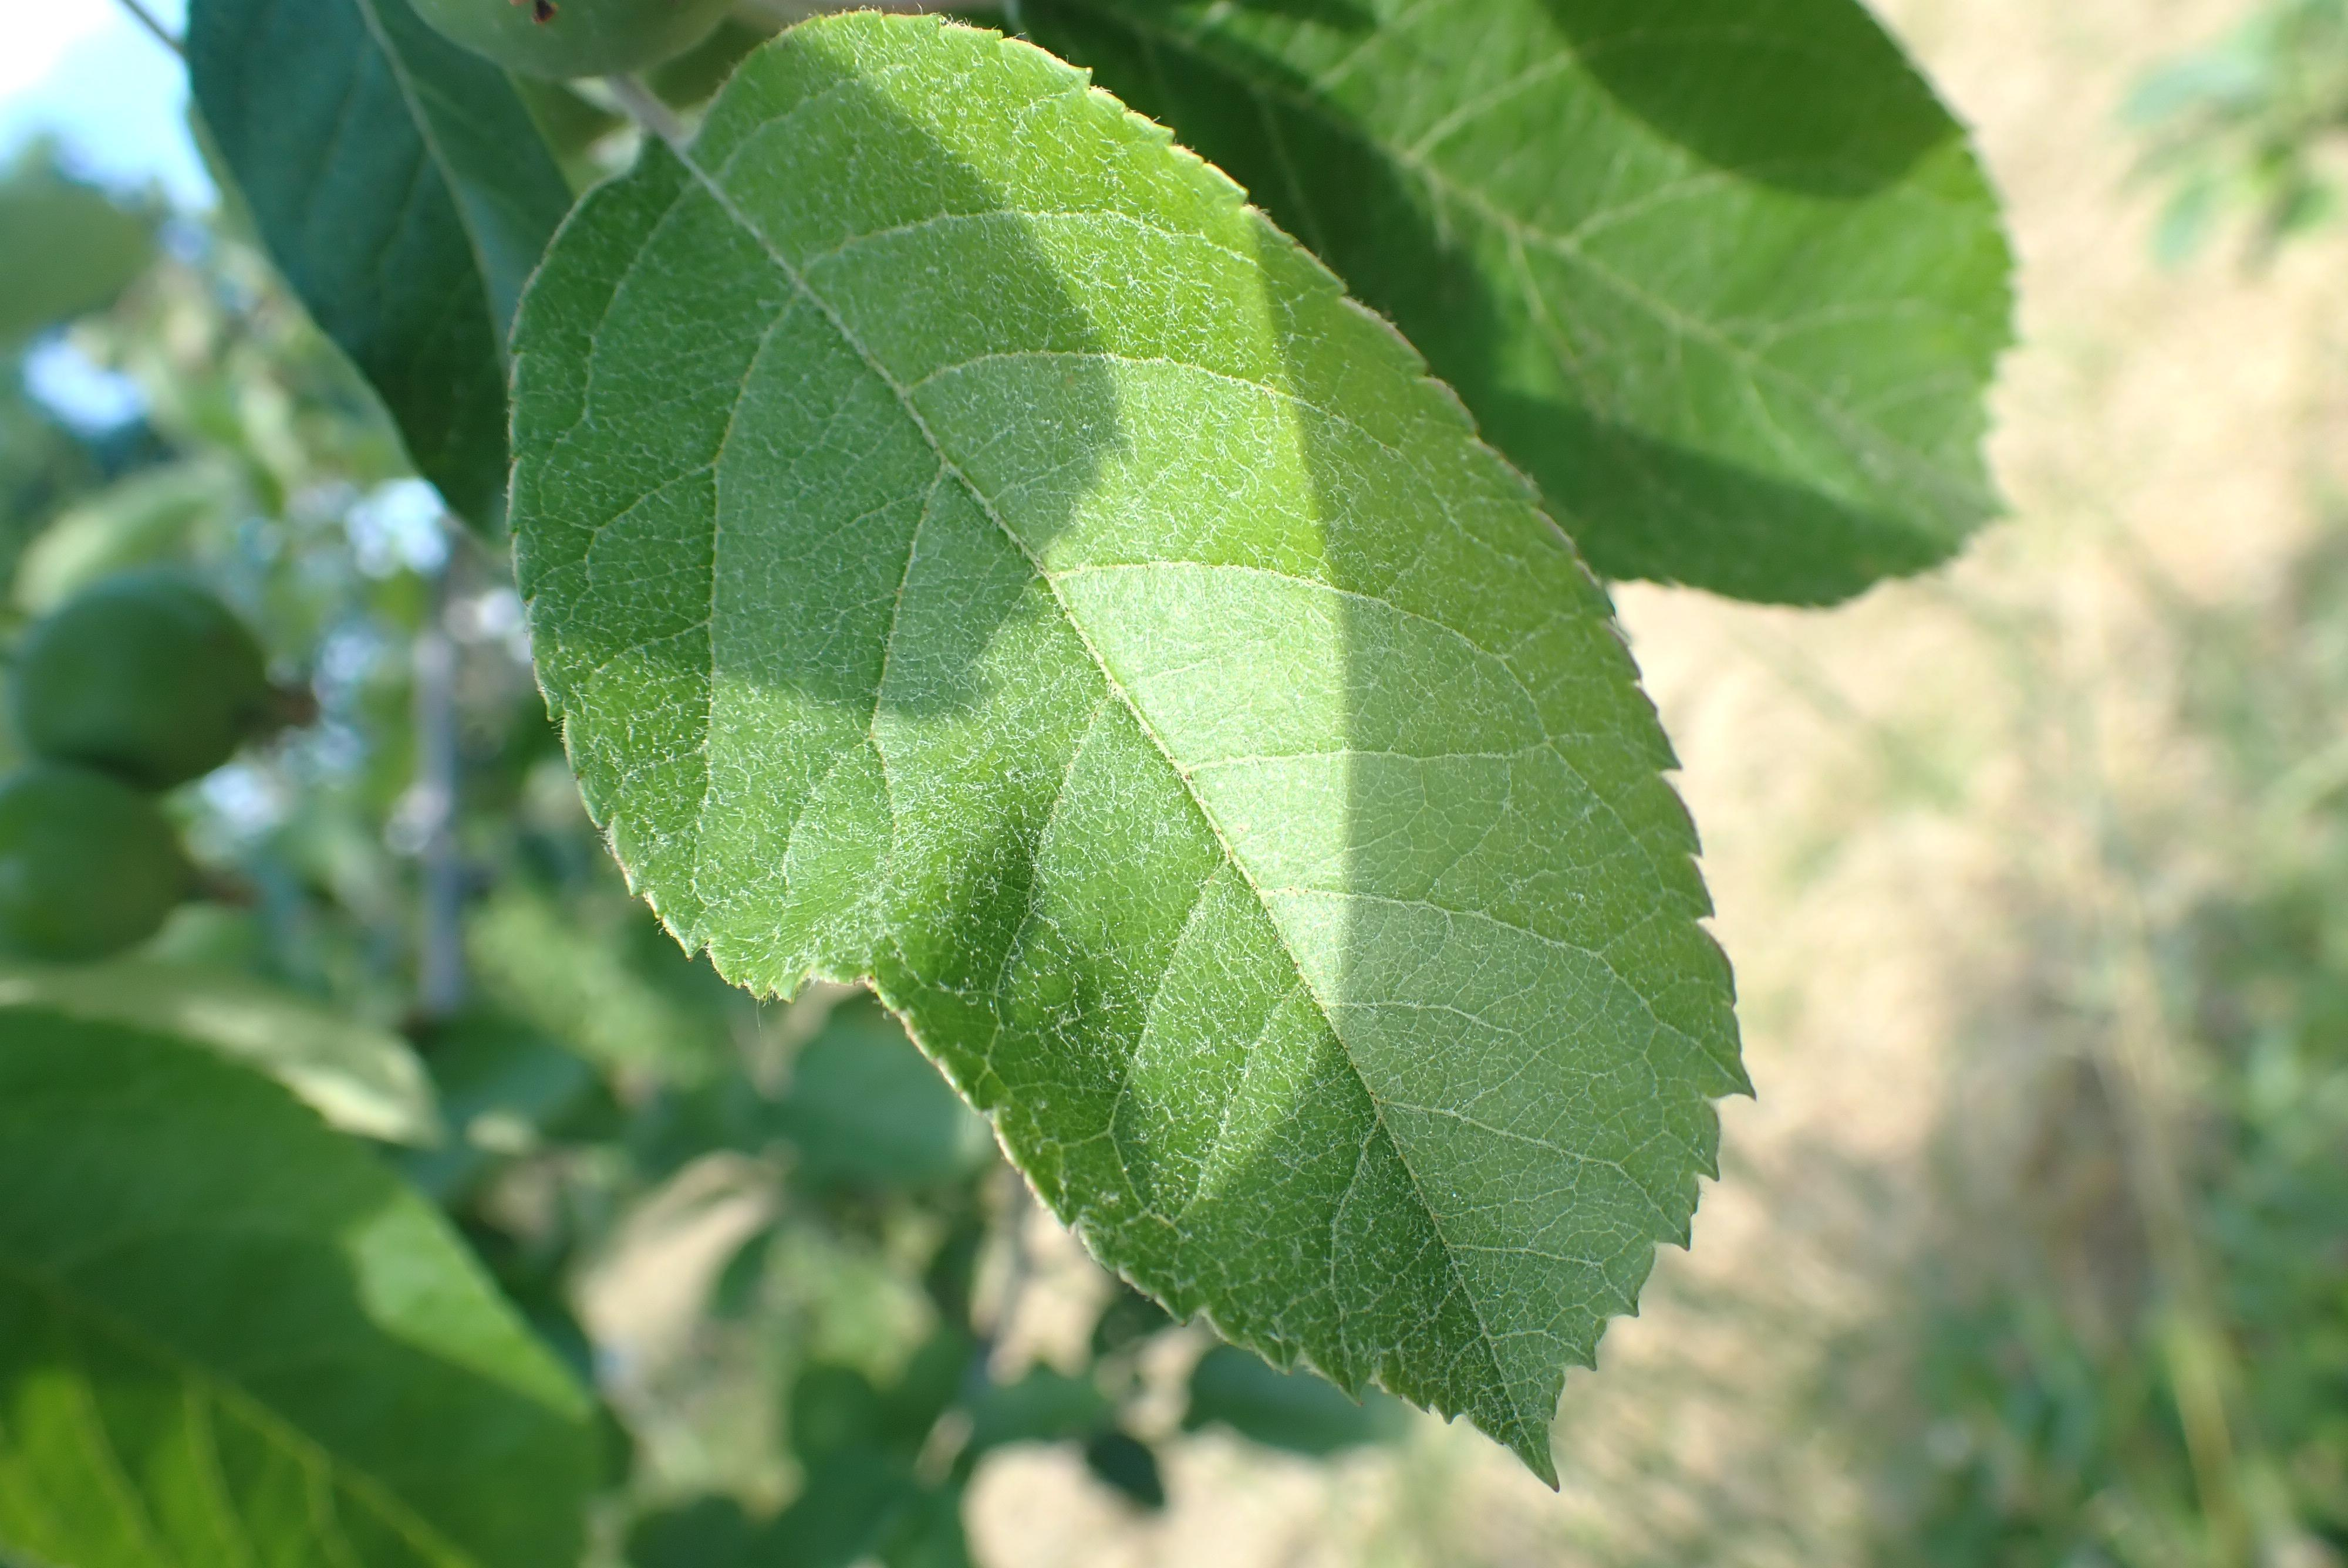

In [2]:
from PIL import Image
import IPython.display as display

image_path = 'Train/Healthy/8dad7a6791407963.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

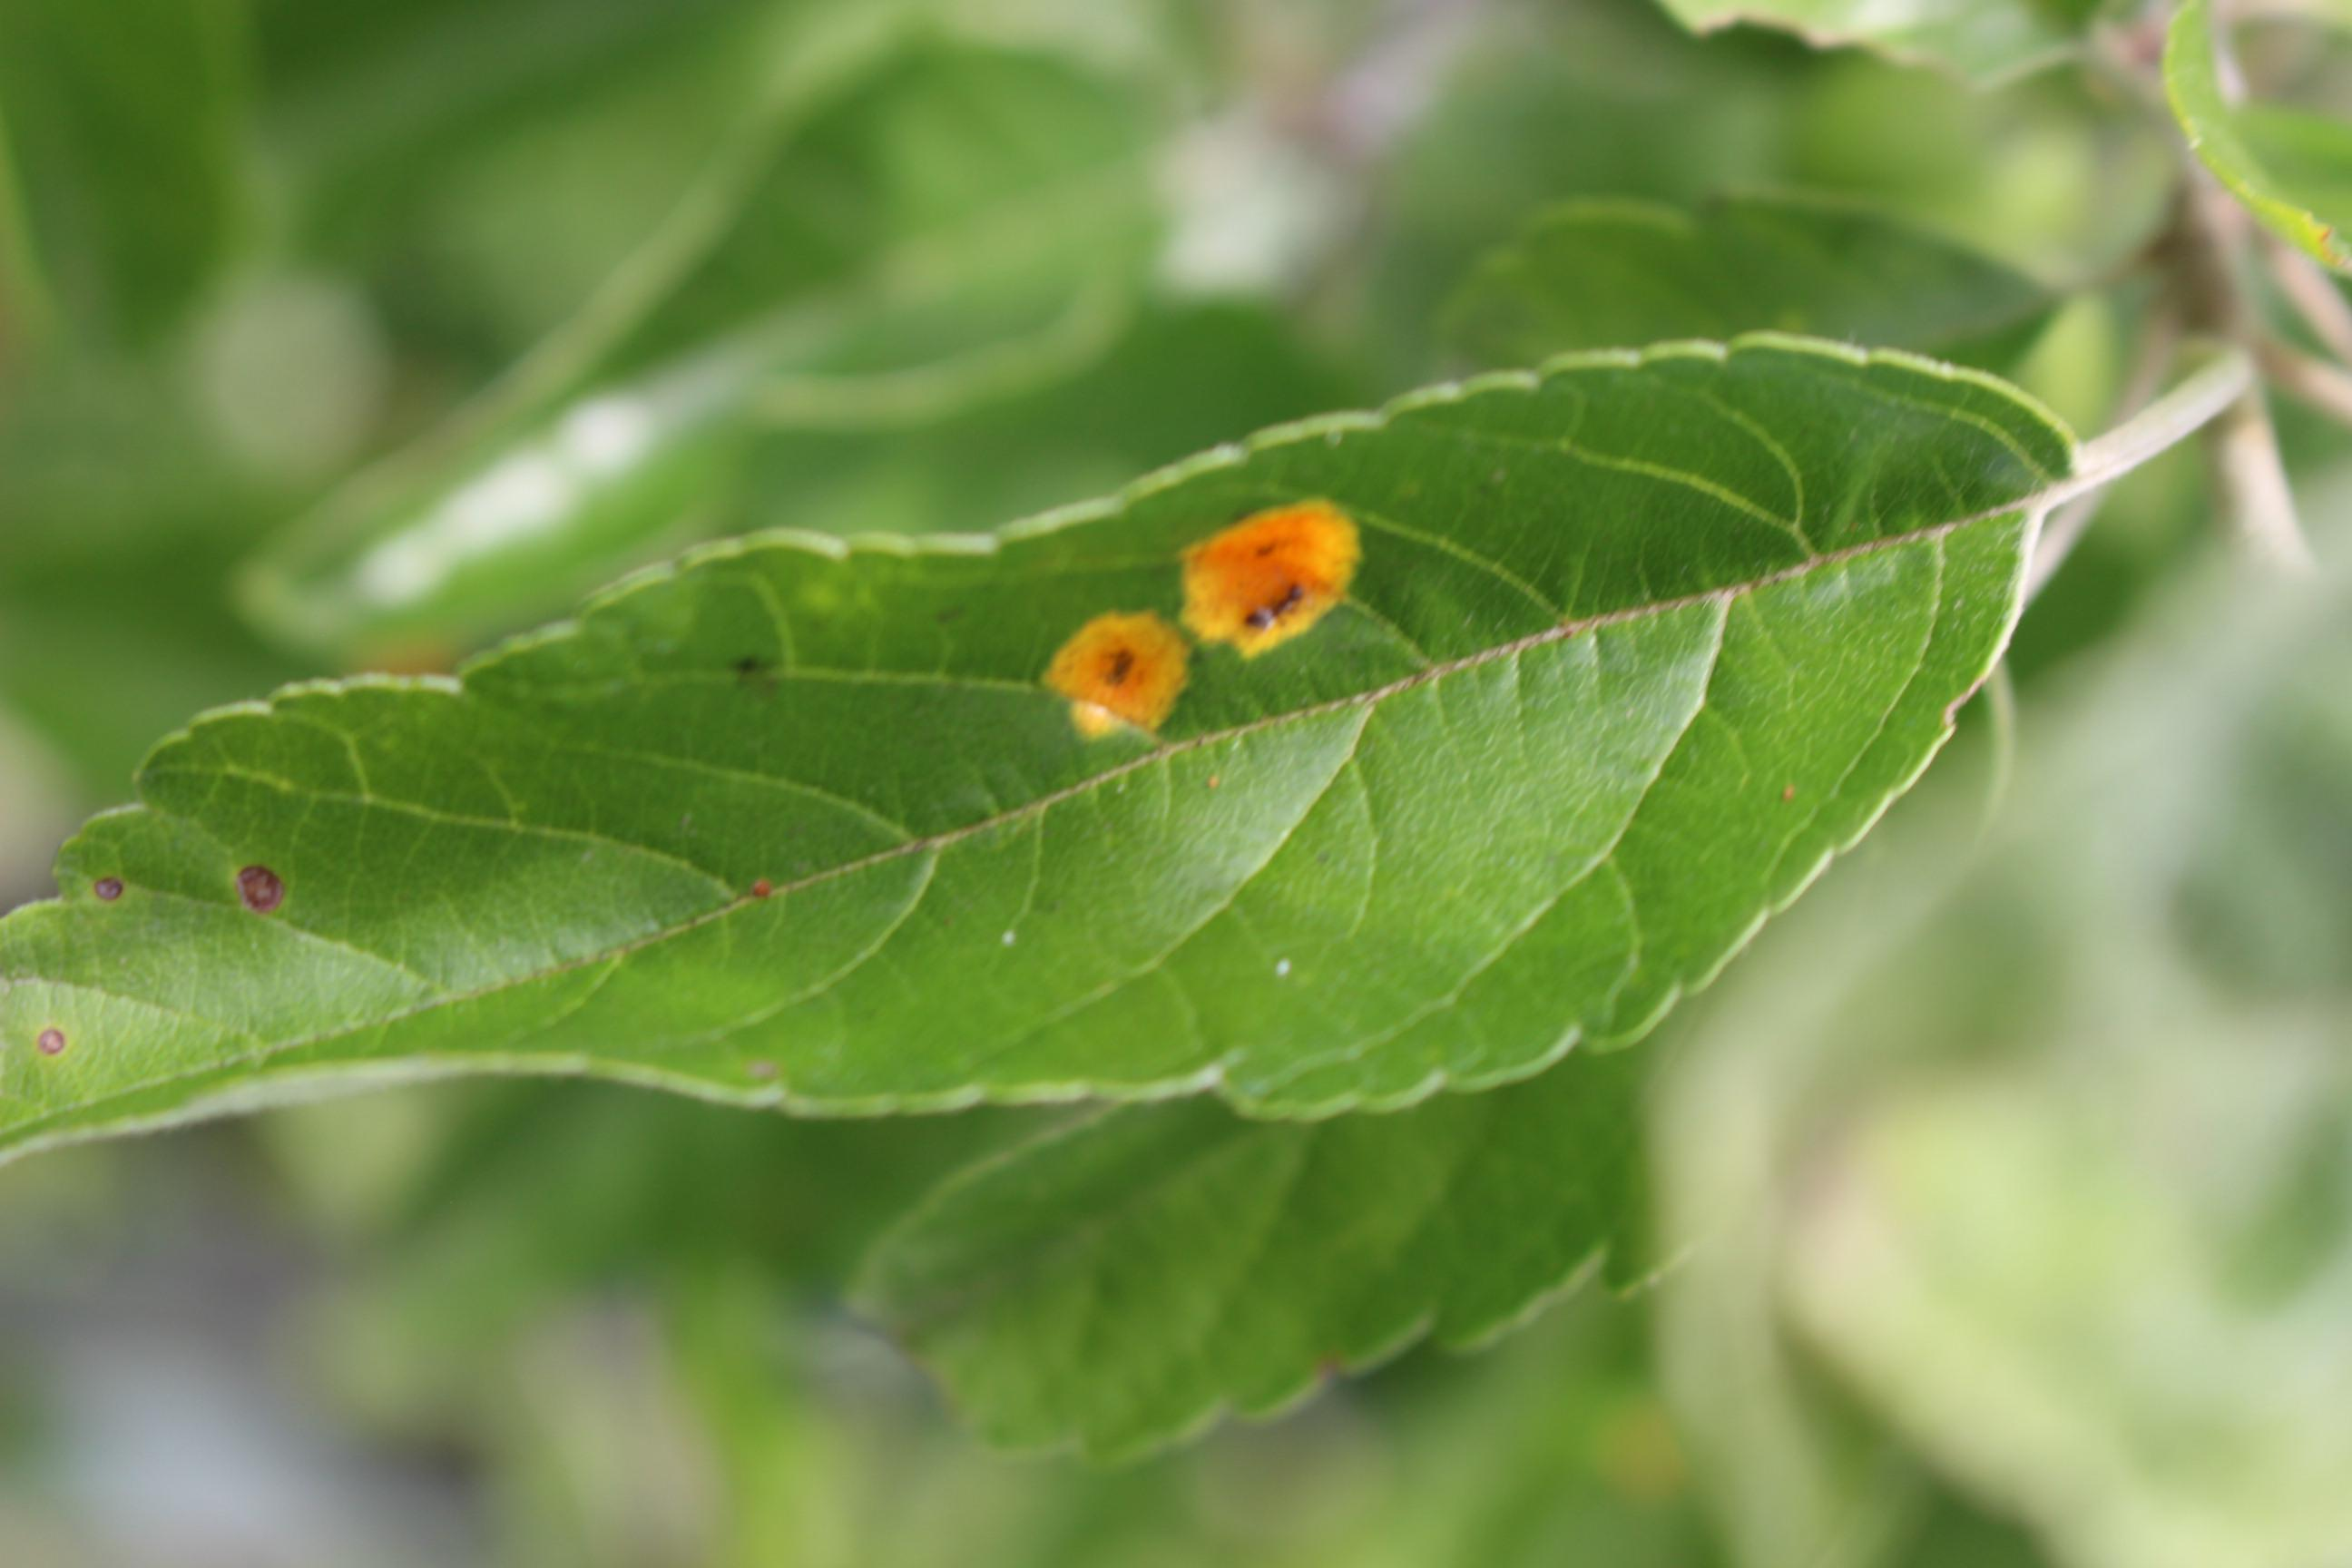

In [3]:
image_path = 'Train/Rust/a9498f9d9b24e2a5.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory('Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('Valid',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

C:\Users\randa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/10


C:\Users\randa\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - accuracy: 0.4460 - loss: 2.5699 - val_accuracy: 0.5667 - val_loss: 0.7763
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.7678 - loss: 0.5507 - val_accuracy: 0.8333 - val_loss: 0.4938
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.8817 - loss: 0.3285 - val_accuracy: 0.8167 - val_loss: 0.4553
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.9227 - loss: 0.2515 - val_accuracy: 0.8667 - val_loss: 0.4159
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.9280 - loss: 0.2245 - val_accuracy: 0.8833 - val_loss: 0.4822
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.9294 - loss: 0.2020 - val_accuracy: 0.8333 - val_loss: 0.4352
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.9452 - loss: 0.1581 - val_accuracy: 0.8833 - val_loss: 0.4454
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.9556 - loss: 0.1540 - val_accuracy: 0.8833 - val_loss: 0.

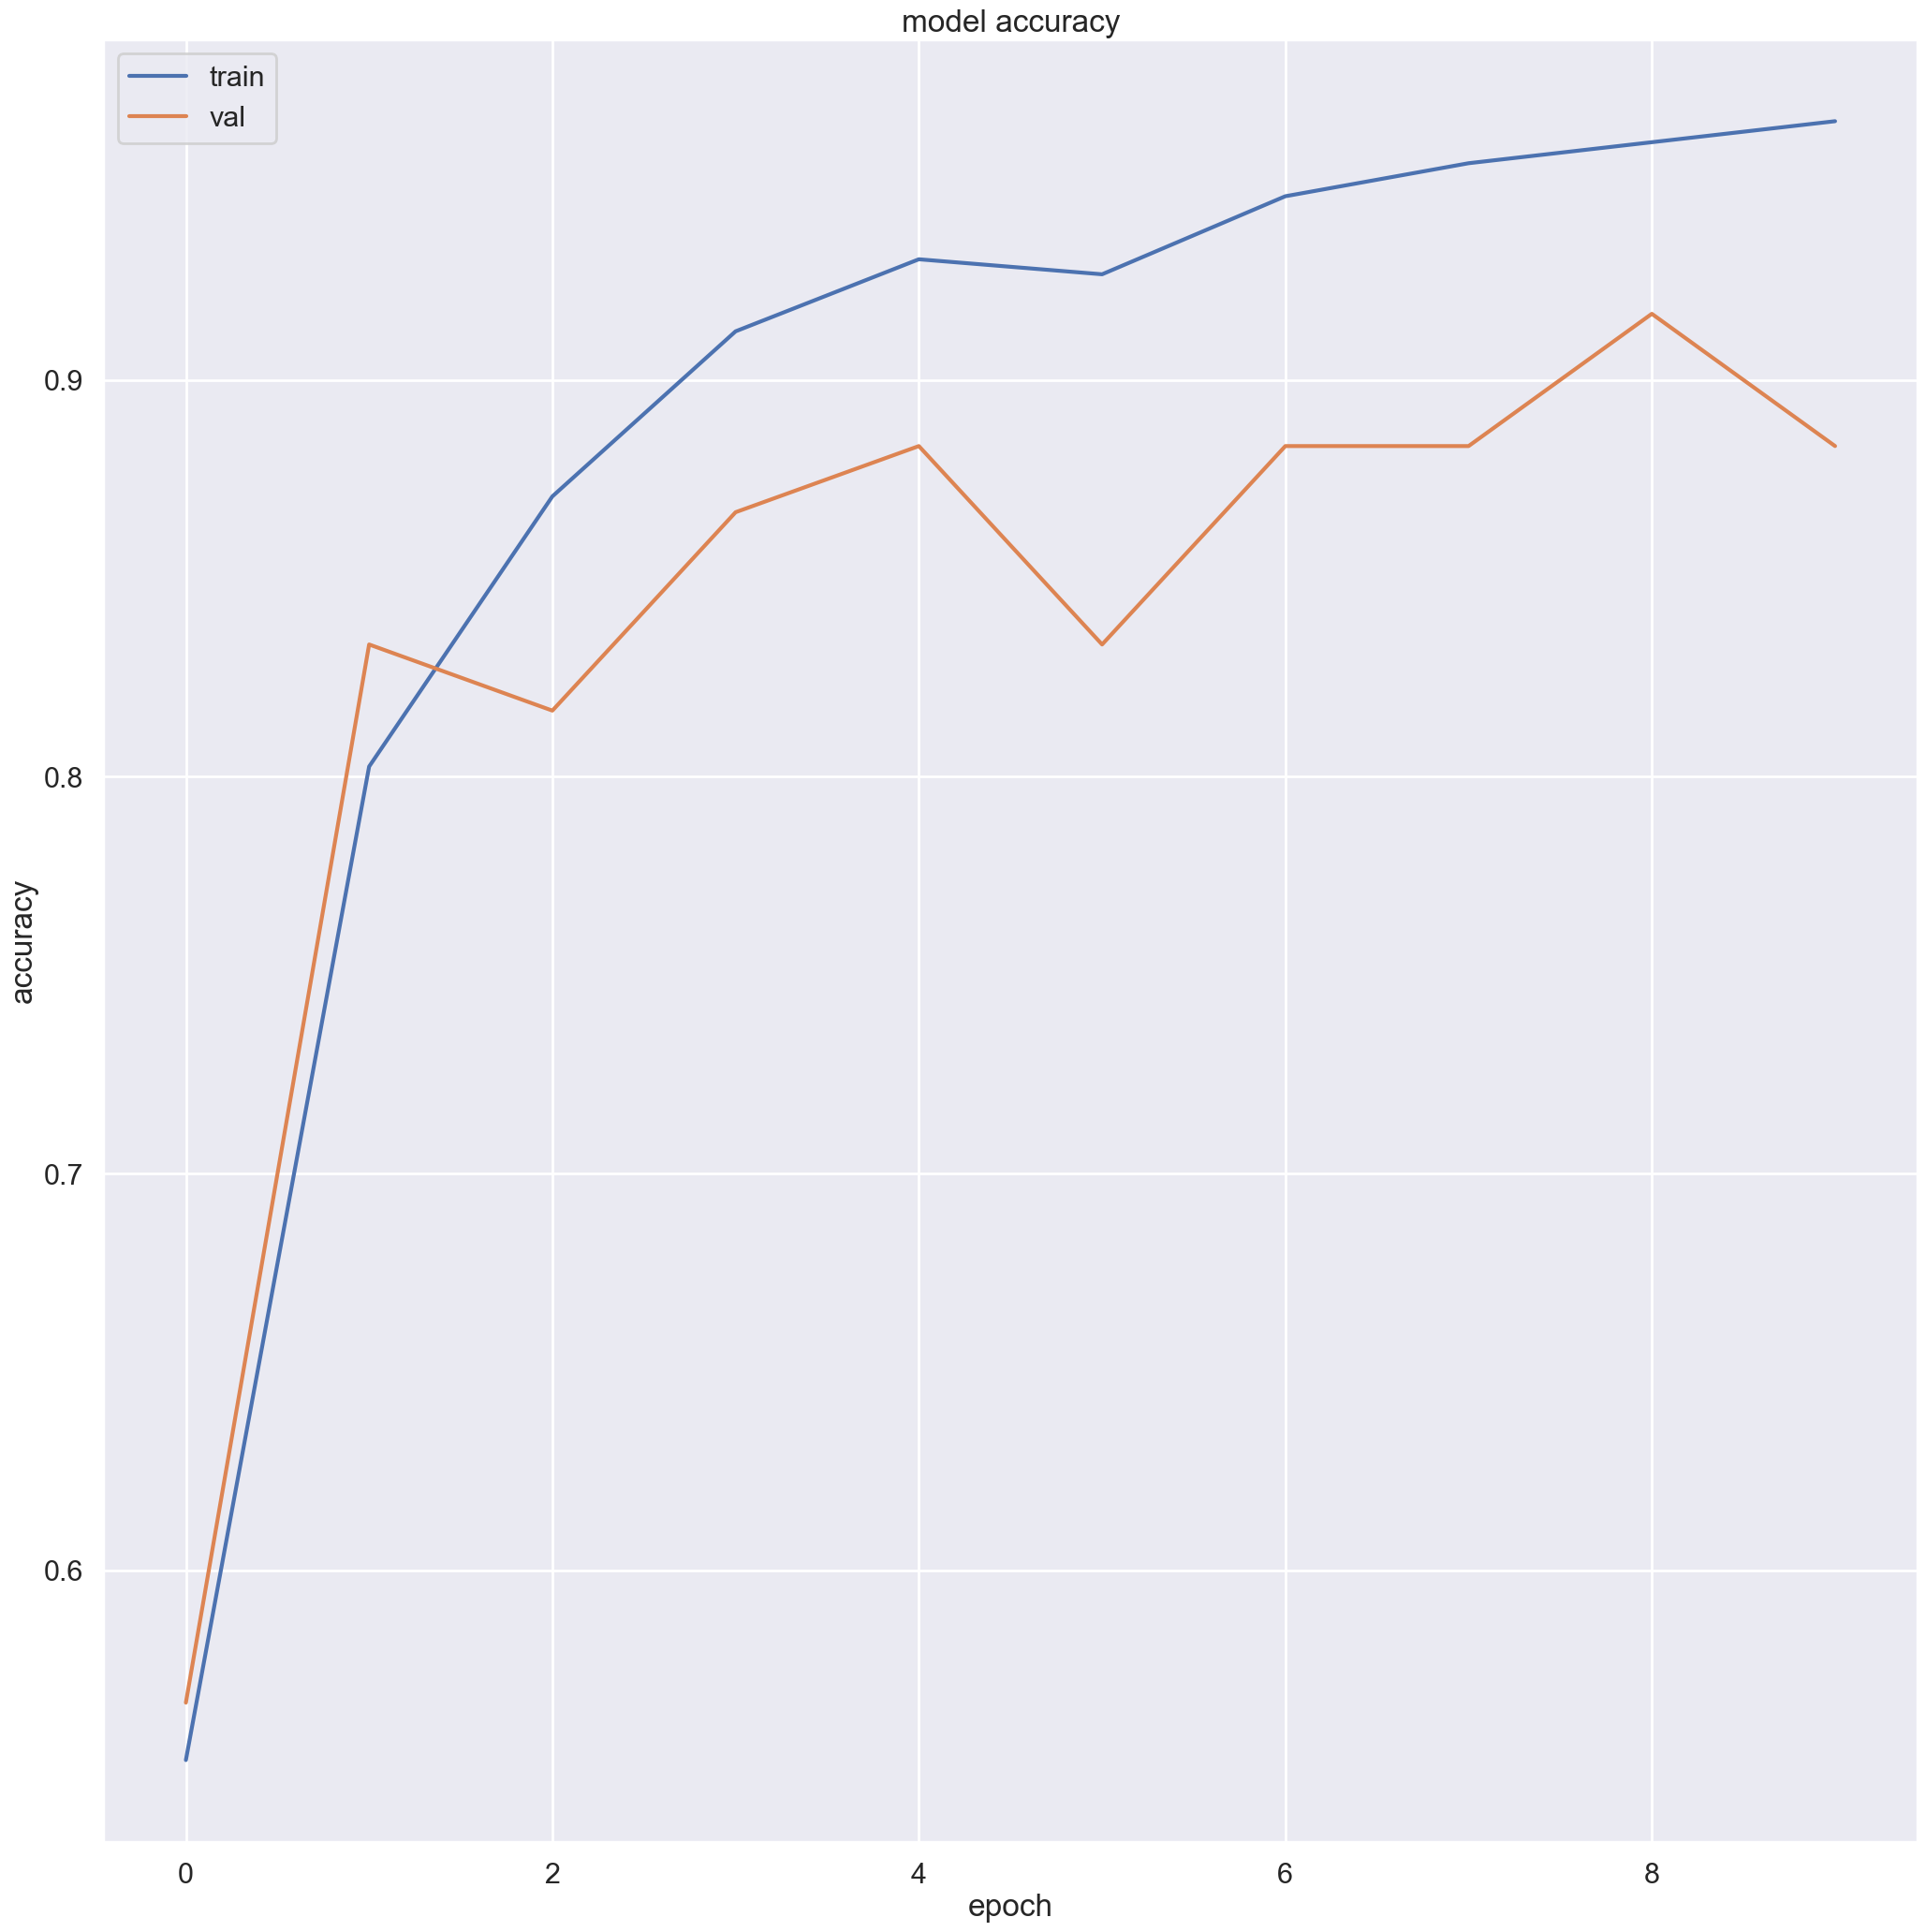

In [9]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [458]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('download.jpg')

In [459]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([9.6740166e-07, 2.8122292e-07, 9.9999881e-01], dtype=float32)

In [460]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [461]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust


In [360]:
model.save("model2.keras")

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step
Classification Report:

              precision    recall  f1-score   support

     Healthy       0.47      0.45      0.46        20
     Powdery       0.55      0.60      0.57        20
        Rust       0.42      0.40      0.41        20

    accuracy                           0.48        60
   macro avg       0.48      0.48      0.48        60
weighted avg       0.48      0.48      0.48        60



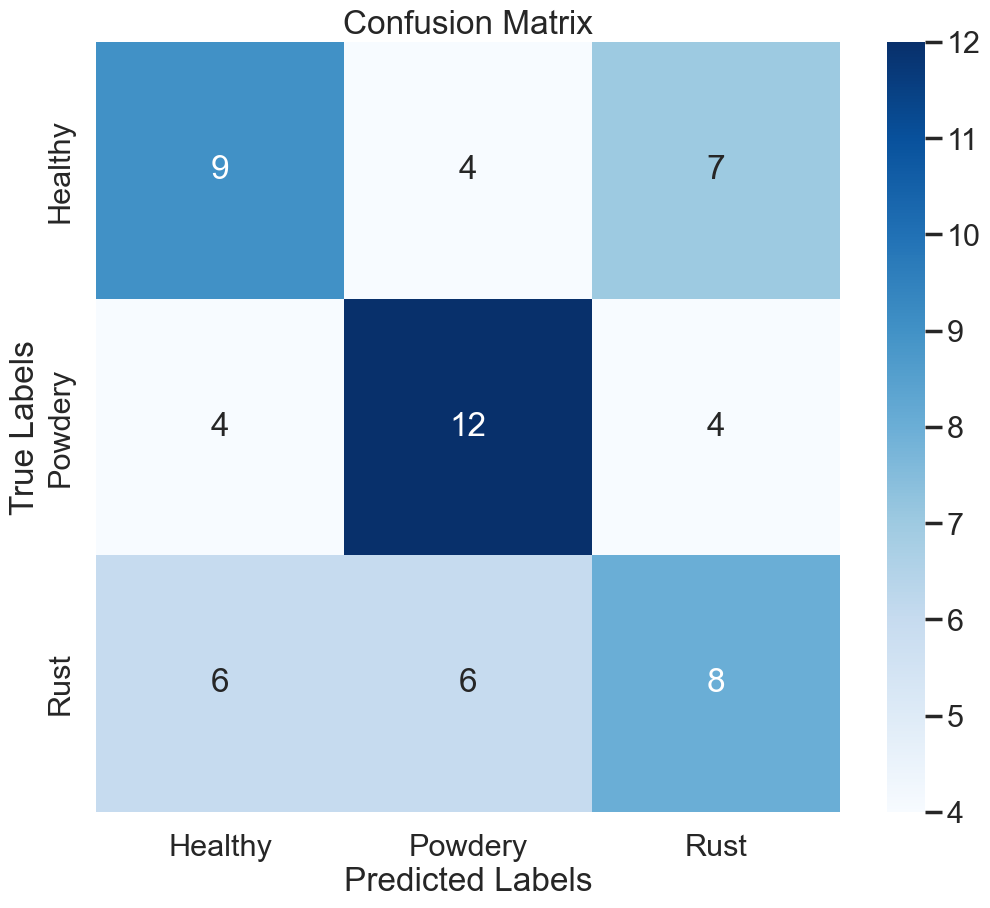

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the validation data
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = validation_generator.classes  # True labels from the generator

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=labels.values())
print("Classification Report:\n")
print(report)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels.values(), yticklabels=labels.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()